### Precursor imports

In [1]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') # Silence RDKit warnings

### Initialize data

In [ ]:
import pandas as pd
df = pd.read_excel('dataset.xlsx')
df[['Ligand Name','SMILES', 'Ni conc [mM]', 'Sample ID', 'max h2 (umol)']]

,Ligand Name,SMILES,Ni conc [mM],Sample ID,max h2 (umol)
0,"1,2-Benzenedithiol",[S-]c1ccccc1[S-],0.025,L10,0.281460
1,triphenylphosphine,c1ccc(cc1)P(c2ccccc2)c3ccccc3,0.025,L11,0.058493
2,"1,2-bis(dicyclohexylphosphino)ethane",C1CCC(CC1)P(CCP(C2CCCCC2)C3CCCCC3)C4CCCCC4,0.025,L12,0.390512
3,2-Mercaptonicotinic acid,[O-]C(=O)c1cccnc1[S-],0.025,L2,4.068596
4,3-Aminopyridine-2(1H)-thione,C1=CNC(=S)C(=C1)N,0.025,L3,9.021096


In [3]:
from rdkit import Chem
smiles = df['SMILES'].unique().tolist()
mols = [Chem.MolFromSmiles(s) for s in smiles]
mol_names = df['Ligand Name'].unique().tolist()
mol_dict = {mol_names[i]: smiles[i] for i in range(len(smiles))}
print(f'Number of unique ligands: {len(smiles)}')

Number of unique ligands: 56


### Display all ligands from smiles

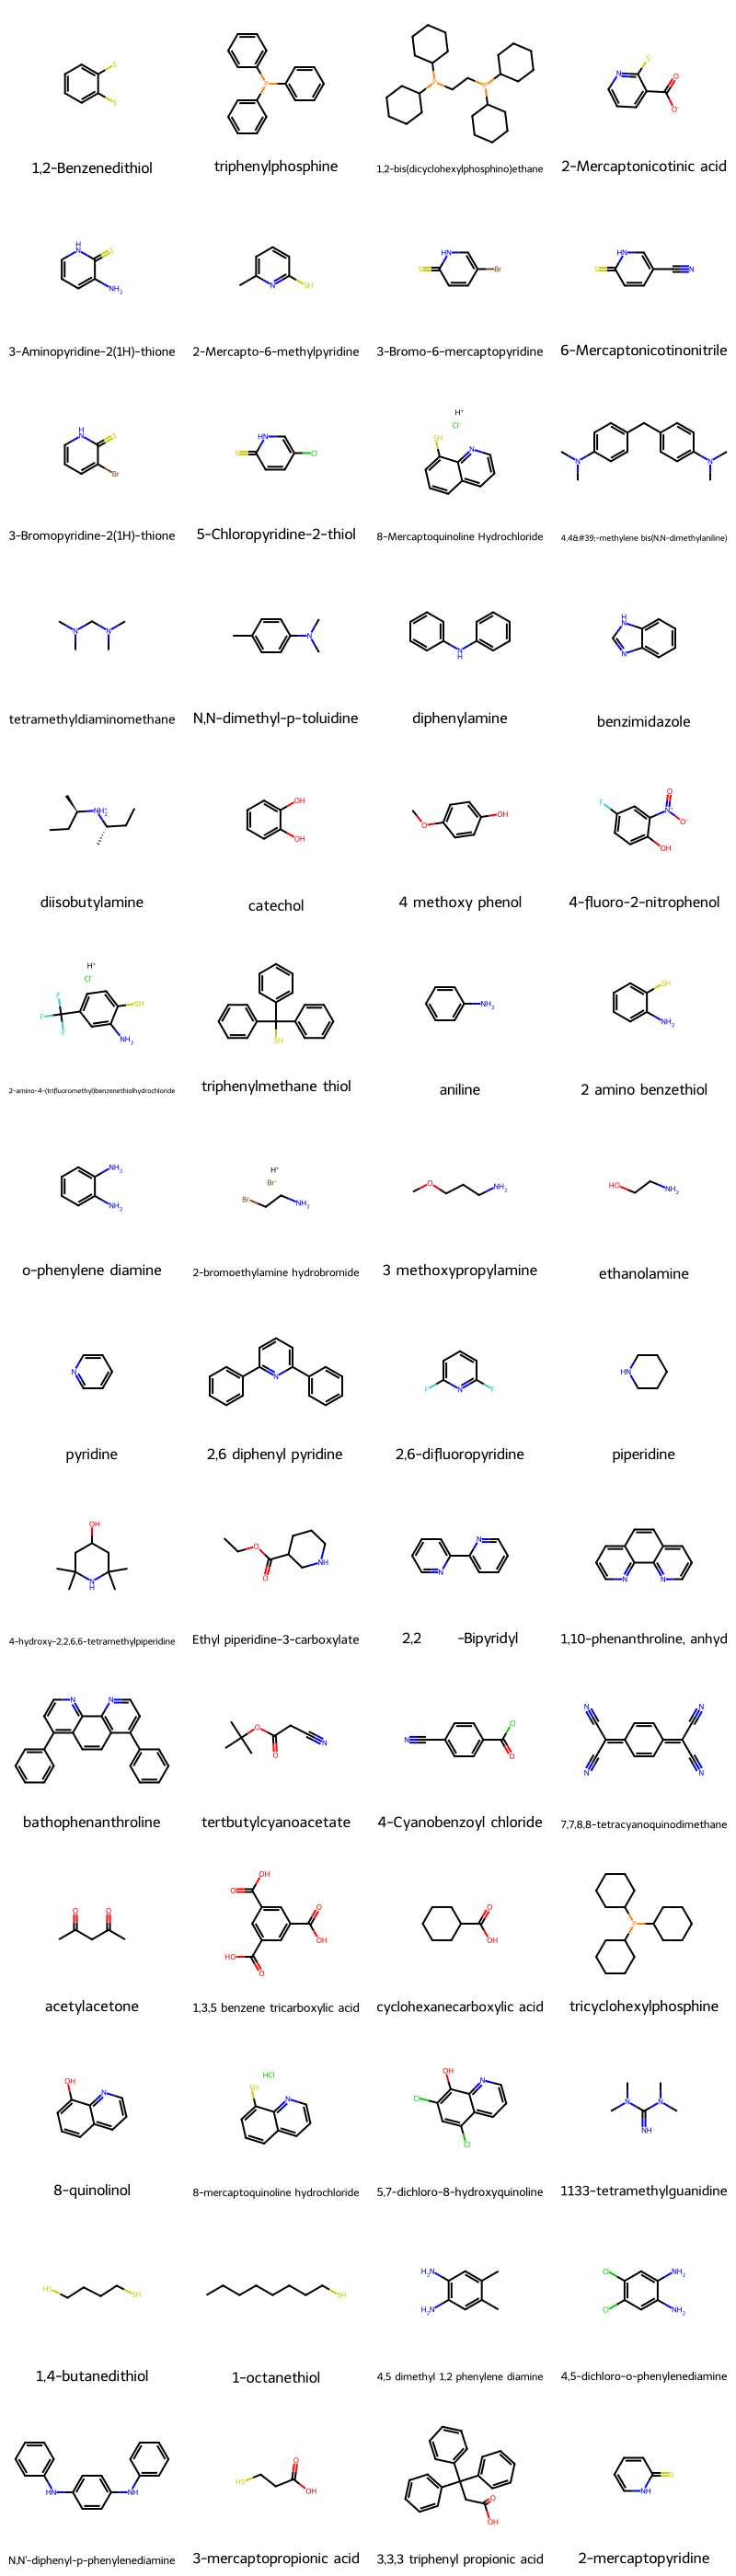

In [4]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols, molsPerRow=4, maxMols=len(smiles), legends=mol_names)

### Fingerprinting

In [5]:
from utils.utils import generate_fingerprints, print_fp_stats

fp_results = []
for i in range(len(mols)):
    fp = generate_fingerprints(mols[i])
    fp_results.append(fp)
    print_fp_stats(fp_results[i], mol_names[i])

1,2-Benzenedithiol Fingerprint Analysis:
Morgan      :  10/2048 bits on (0.5% density)
MACCS       :  10/167 bits on (6.0% density)
Topological :  57/2048 bits on (2.8% density)
AtomPair    :  25/2048 bits on (1.2% density)

triphenylphosphine Fingerprint Analysis:
Morgan      :  12/2048 bits on (0.6% density)
MACCS       :   7/167 bits on (4.2% density)
Topological : 119/2048 bits on (5.8% density)
AtomPair    :  58/2048 bits on (2.8% density)

1,2-bis(dicyclohexylphosphino)ethane Fingerprint Analysis:
Morgan      :  15/2048 bits on (0.7% density)
MACCS       :  12/167 bits on (7.2% density)
Topological : 158/2048 bits on (7.7% density)
AtomPair    : 110/2048 bits on (5.4% density)

2-Mercaptonicotinic acid Fingerprint Analysis:
Morgan      :  24/2048 bits on (1.2% density)
MACCS       :  23/167 bits on (13.8% density)
Topological : 296/2048 bits on (14.5% density)
AtomPair    :  43/2048 bits on (2.1% density)

3-Aminopyridine-2(1H)-thione Fingerprint Analysis:
Morgan      :  19/2048 

### Molecular Similarity Calculations

In [6]:
from utils.utils import calculate_similarity_matrix, visualize_similarity_interactive

sm = ['Tanimoto', 'Dice']
ft = ['Morgan', 'Topological', 'MACCS', 'AtomPair']

tanimoto_matrix = calculate_similarity_matrix(mol_dict, fp_type=ft[0], similarity_metric=sm[0])
dice_matrix = calculate_similarity_matrix(mol_dict, fp_type=ft[0], similarity_metric=sm[1])
mol_id = [i for i in range(len(mol_names))]

visualize_similarity_interactive(tanimoto_matrix, mol_names, 'jet', ft[0], sm[0])


Most similar pair: diphenylamine & N,N'-diphenyl-p-phenylenediamine (Similarity: 0.923)


In [7]:
print(f'Most similar pair: {mol_names[14]} & {mol_names[52]}')

Most similar pair: diphenylamine & N,N'-diphenyl-p-phenylenediamine


In [8]:
visualize_similarity_interactive(dice_matrix, mol_names, 'jet', ft[0], sm[1])


Most similar pair: diphenylamine & N,N'-diphenyl-p-phenylenediamine (Similarity: 0.960)


### Molecular Descriptors

In [41]:
from utils.utils import calculate_descriptors

# Calculate descriptors for our drug dataset
descriptor_data = []
for name, smiles in mol_dict.items():
    mol = Chem.MolFromSmiles(smiles)
    desc = calculate_descriptors(mol, name)
    descriptor_data.append(desc)

# Create DataFrame
df_desc = pd.DataFrame(descriptor_data)

print("Molecular Descriptors for Ligand Dataset:")
print("=" * 45)
df_desc.round(2).head(10)

Molecular Descriptors for Ligand Dataset:


,Name,MW,HeavyAtoms,NumBonds,NumRings,NumAromaticRings,LogP,HBD,HBA,TPSA,BertzCT,Chi0v,Kappa1,NumRotatableBonds,FractionCsp3
0,"1,2-Benzenedithiol",140.23,8,8,1,1,1.50,0,2,0.00,162.64,5.76,5.79,0,0.00
1,triphenylphosphine,262.29,19,21,3,3,3.44,0,0,0.00,523.71,11.50,12.14,3,0.00
2,"1,2-bis(dicyclohexylphosphino)ethane",422.62,28,31,4,0,9.28,0,0,0.00,336.15,20.55,22.07,7,1.00
3,2-Mercaptonicotinic acid,153.16,10,10,1,1,-0.65,0,4,53.02,261.68,5.72,6.95,1,0.00
4,3-Aminopyridine-2(1H)-thione,126.18,8,8,1,1,1.33,2,2,41.81,227.87,5.03,5.31,0,0.00
5,2-Mercapto-6-methylpyridine,125.20,8,8,1,1,1.68,1,2,12.89,168.39,5.52,5.63,0,0.17
6,3-Bromo-6-mercaptopyridine,190.06,8,8,1,1,2.51,1,1,15.79,209.62,6.42,5.98,0,0.00
7,6-Mercaptonicotinonitrile,136.18,9,9,1,1,1.62,1,2,39.58,274.17,5.40,5.99,0,0.00
8,3-Bromopyridine-2(1H)-thione,190.06,8,8,1,1,2.51,1,1,15.79,229.87,6.42,5.98,0,0.00
9,5-Chloropyridine-2-thiol,145.61,8,8,1,1,2.40,1,1,15.79,209.62,5.59,5.79,0,0.00


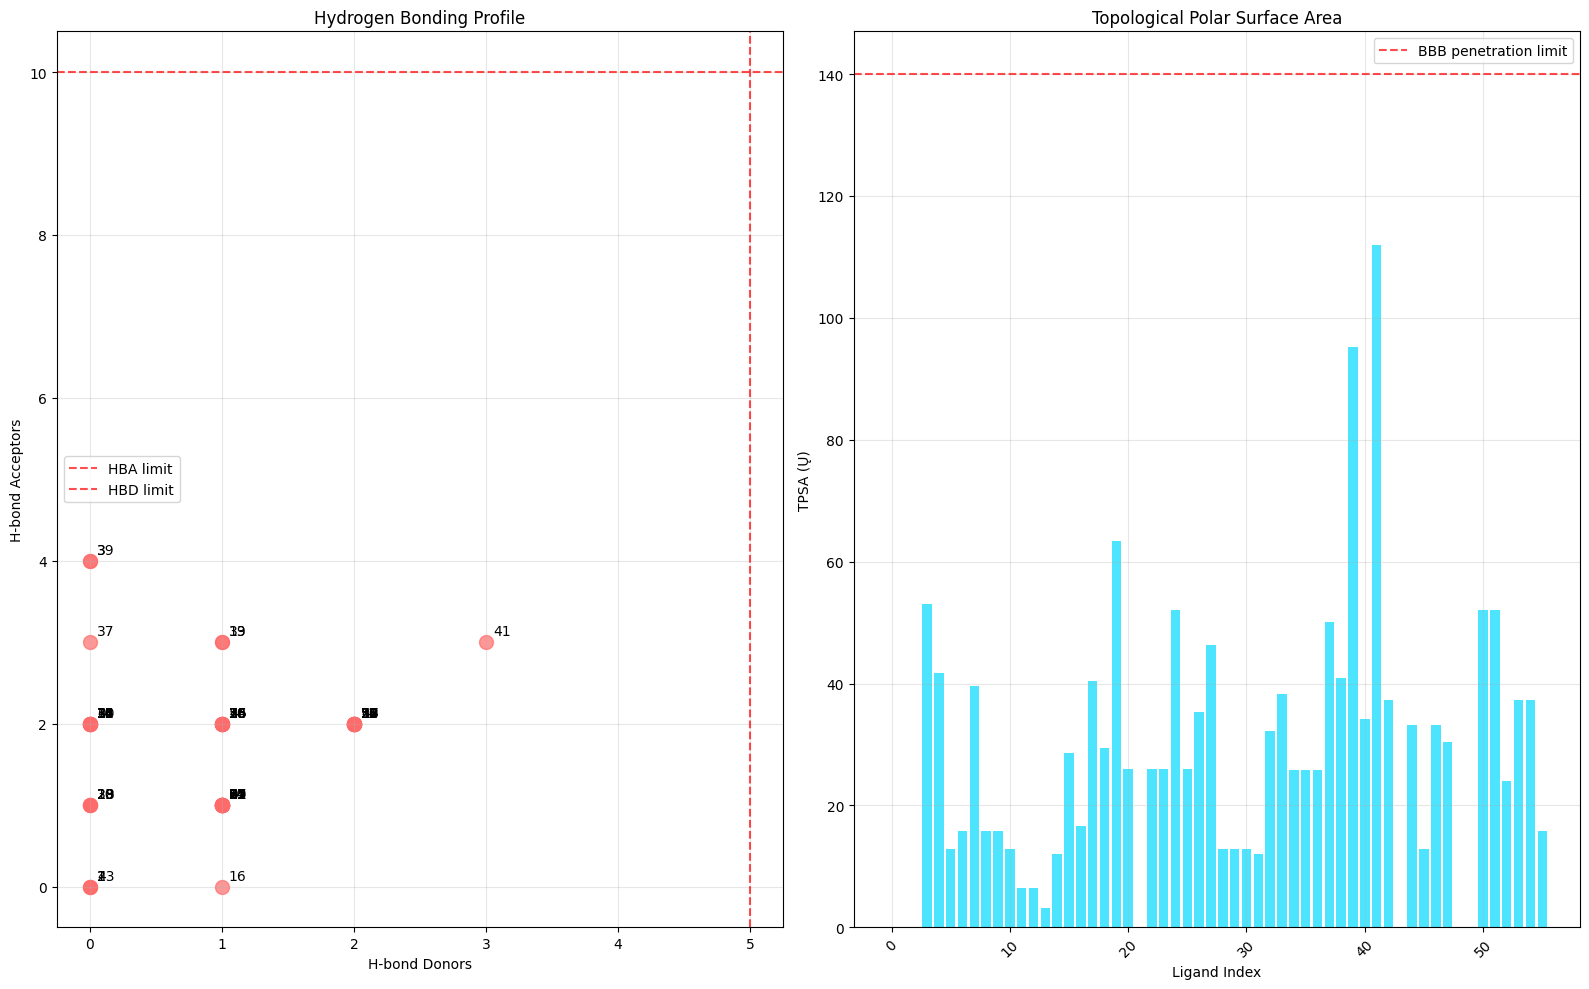

In [42]:
# Visualize descriptor relationships
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# H-bond donors vs acceptors
axes[0].scatter(df_desc['HBD'], df_desc['HBA'], s=100, alpha=0.7, color='#FF6B6B')
axes[0].axhline(y=10, color='red', linestyle='--', alpha=0.7, label='HBA limit')
axes[0].axvline(x=5, color='red', linestyle='--', alpha=0.7, label='HBD limit')
for i, name in enumerate(df_desc.index):
    axes[0].annotate(name, (df_desc['HBD'].iloc[i], df_desc['HBA'].iloc[i]), 
                  xytext=(5, 5), textcoords='offset points', fontsize=10)
axes[0].set_xlabel('H-bond Donors')
axes[0].set_ylabel('H-bond Acceptors')
axes[0].set_title('Hydrogen Bonding Profile')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# TPSA distribution
axes[1].bar(df_desc.index, df_desc['TPSA'], color='#00D9FF', alpha=0.7)
axes[1].axhline(y=140, color='red', linestyle='--', alpha=0.7, label='BBB penetration limit')
axes[1].set_ylabel('TPSA (Ų)')
axes[1].set_xlabel('Ligand Index')
axes[1].set_title('Topological Polar Surface Area')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Substructure Pattern Recognition

In [50]:
from utils.utils import analyze_substructures

# I totally used Gemini to come up with common patterns for HER ligands. 
# Thus, not validated.
her_ligand_patterns = {
    # --- Nitrogen Donors ---
    'Pyridine': 'c1ncccc1',
    'Bipyridine_2,2': 'n1ccccc1-c2ccccn2', # 2,2'-bipyridine scaffold
    'Amine Coordinator': '[Nv3;!$(N=O);!$(N-N);!$(N#*)]',  # Basic amine, not part of amide, nitro, etc.
    'Pendant Amine (proton relay)': 'N(CC)CC', # Common motif in DuBois-type catalysts

    # --- Phosphorus Donors ---
    'Phosphine': '[P&X3]',  # Trivalent phosphorus
    'Diphosphine (C2 bridge)': '[P]~[C]~[C]~[P]', # e.g., dppe-like backbone

    # --- Sulfur Donors ---
    'Thioether': '[S&X2]', # Divalent sulfur, e.g., R-S-R
    'Thiolate': '[S-;X1]', # Coordinated thiolate anion

    # --- Common Backbones ---
    'Benzene Scaffold': 'c1ccccc1',
    #'Aromatic Ring': 'a', # Any aromatic ring
    'Pincer-ready Phenyl': 'c1c(-*)c(-*)ccc1(-*)' # Phenyl ring substituted at 1,2,3 or 1,2,6 etc.
}

substructure_df = analyze_substructures(mol_dict, her_ligand_patterns)

print("Substructure Analysis:")
print("=" * 25)
substructure_df.head(10)

Substructure Analysis:


,Molecule,Pyridine,"Bipyridine_2,2",Amine Coordinator,Pendant Amine (proton relay),Phosphine,Diphosphine (C2 bridge),Thioether,Thiolate,Benzene Scaffold,Pincer-ready Phenyl
0,"1,2-Benzenedithiol",0,0,0,0,0,0,0,2,1,0
1,triphenylphosphine,0,0,0,0,1,0,0,0,3,0
2,"1,2-bis(dicyclohexylphosphino)ethane",0,0,0,0,2,1,0,0,0,0
3,2-Mercaptonicotinic acid,1,0,0,0,0,0,0,1,0,0
4,3-Aminopyridine-2(1H)-thione,1,0,1,0,0,0,0,0,0,0
5,2-Mercapto-6-methylpyridine,1,0,0,0,0,0,1,0,0,0
6,3-Bromo-6-mercaptopyridine,1,0,0,0,0,0,0,0,0,0
7,6-Mercaptonicotinonitrile,1,0,0,0,0,0,0,0,0,0
8,3-Bromopyridine-2(1H)-thione,1,0,0,0,0,0,0,0,0,0
9,5-Chloropyridine-2-thiol,1,0,0,0,0,0,0,0,0,0


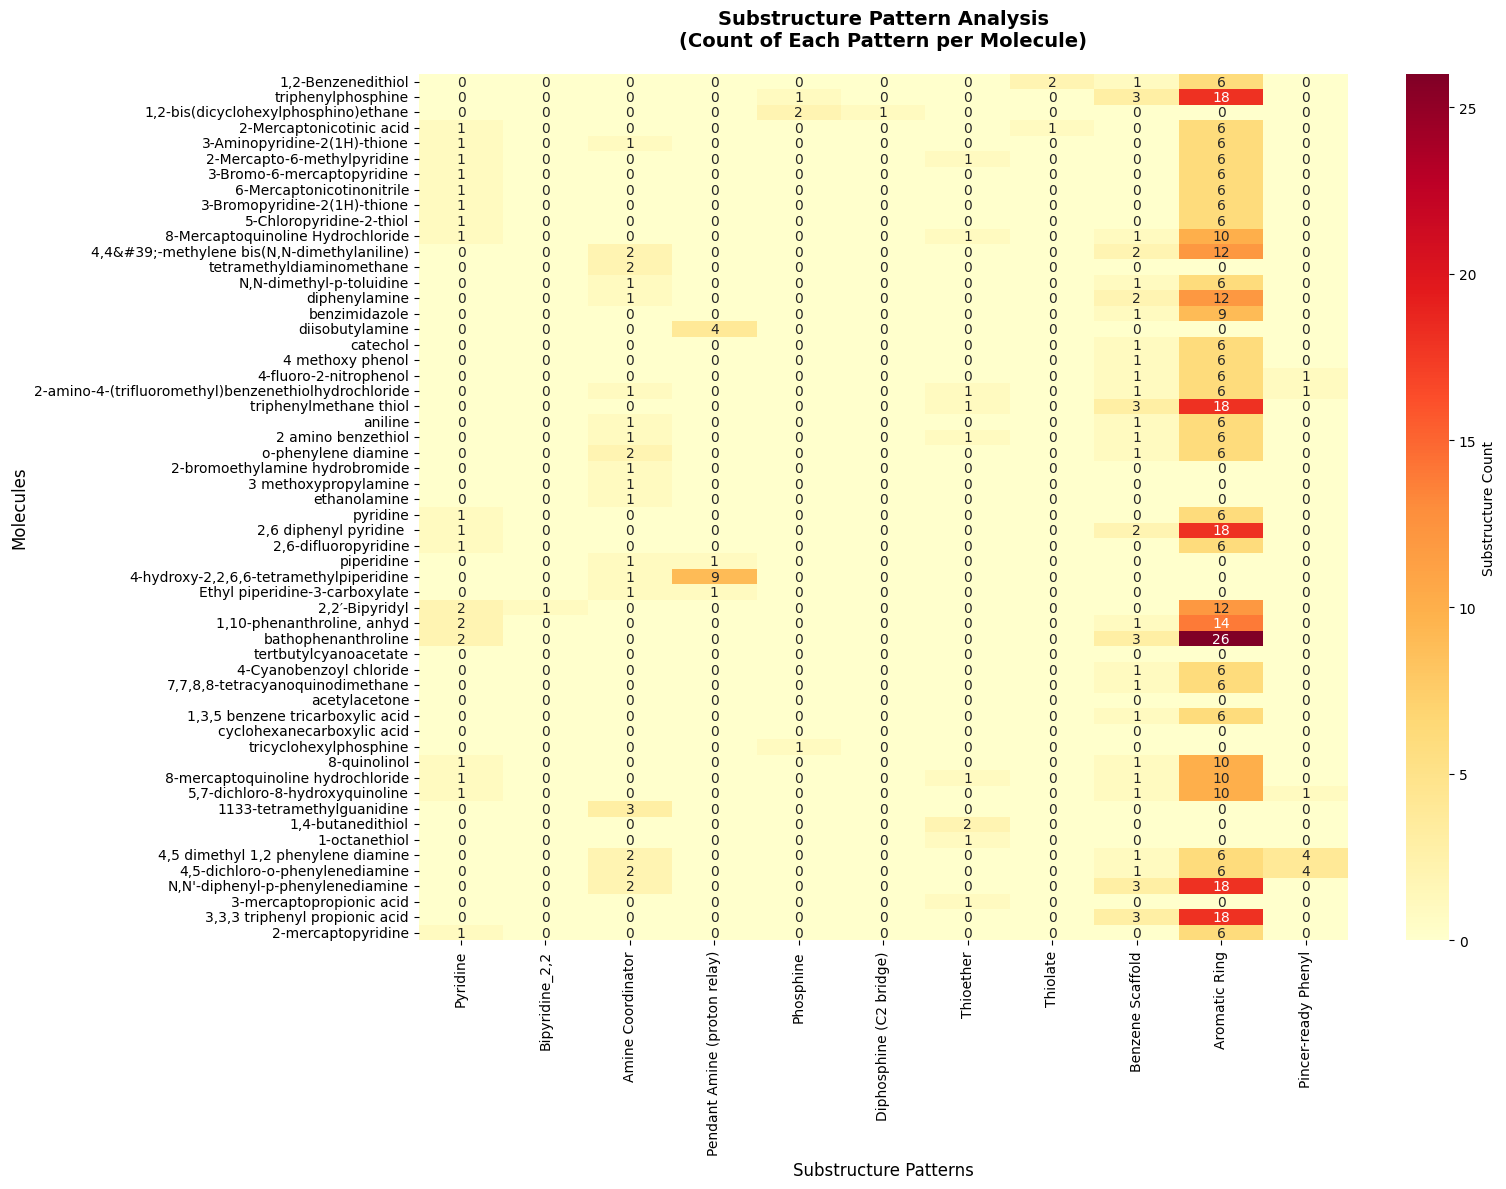

In [12]:
import seaborn as sns
# Create substructure heatmap
# Prepare data for heatmap (exclude molecule names)
heatmap_data = substructure_df.set_index('Molecule')

fig, ax = plt.subplots(figsize=(16, 12))

sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='d', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Substructure Count'},
            ax=ax)

ax.set_title('Substructure Pattern Analysis\n(Count of Each Pattern per Molecule)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Molecules', fontsize=12)
ax.set_xlabel('Substructure Patterns', fontsize=12)

plt.tight_layout()
plt.show()

### Preliminary ML models

We will start with the following models:
1. Gaussian Process
2. Linear Regression
3. Gradient Boosting (or Random Forest)

In [112]:
import numpy as np
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Use concentrations corresponding to max H2 production for each ligand
#df_model = df.loc[df.groupby('Ligand Name')['max h2 (umol)'].idxmax()][['Ligand Name', 'max h2 (umol)', 'Ni conc [mM]']]

# Use all concentrations for each ligand
df_model = df[['Ligand Name', 'max h2 (umol)', 'Ni conc [mM]']]
df_model.head()

,Ligand Name,max h2 (umol),Ni conc [mM]
0,"1,2-Benzenedithiol",0.281460,0.025
1,triphenylphosphine,0.058493,0.025
2,"1,2-bis(dicyclohexylphosphino)ethane",0.390512,0.025
3,2-Mercaptonicotinic acid,4.068596,0.025
4,3-Aminopyridine-2(1H)-thione,9.021096,0.025


Merge molecular descriptors with experimental data

In [115]:
# Merge molecular descriptors with experimental data
ml_data = df_model.set_index('Ligand Name').join(df_desc.set_index('Name'))
ml_data.reset_index(inplace=True)
print(ml_data.shape)

# Add substructure features
substructure_features = substructure_df.set_index('Molecule')
substructure_features.reset_index(inplace=True)
substructure_features.rename(columns={'Molecule': 'Ligand Name'}, inplace=True)

# Merge with ml_data
ml_data = ml_data.merge(substructure_features, on='Ligand Name', how='left')

# Add fingerprint features (using your existing fp_results)
fingerprint_features = []
for i, name in enumerate(mol_names):
    fp_data = {'Ligand Name': name}
    
    # Use Morgan fingerprint bits (first 50 most variable bits)
    morgan_bits = np.array(fp_results[i]['Morgan'])
    # Select bits with some variance
    bit_variance = []
    for bit_idx, bit_val in enumerate(morgan_bits):
        # This is simplified - in practice, calculate variance across all molecules
        fp_data[f'morgan_bit_{bit_idx}'] = bit_val
    
    fingerprint_features.append(fp_data)

fp_df = pd.DataFrame(fingerprint_features)
ml_data = ml_data.merge(fp_df, on='Ligand Name', how='left')

print(ml_data.shape)
pd.set_option('display.max_columns', None)
ml_data.head()

(504, 17)
(504, 2075)


Ligand Name  max h2 (umol)  Ni conc [mM]       MW  \
0                    1,2-Benzenedithiol       0.281460         0.025  140.232   
1                    triphenylphosphine       0.058493         0.025  262.292   
2  1,2-bis(dicyclohexylphosphino)ethane       0.390512         0.025  422.618   
3              2-Mercaptonicotinic acid       4.068596         0.025  153.162   
4          3-Aminopyridine-2(1H)-thione       9.021096         0.025  126.184   

   HeavyAtoms  NumBonds  NumRings  NumAromaticRings     LogP  HBD  HBA   TPSA  \
0           8         8         1                 1  1.49820    0    2   0.00   
1          19        21         3                 3  3.44480    0    0   0.00   
2          28        31         4                 0  9.28100    0    0   0.00   
3          10        10         1                 1 -0.64910    0    4  53.02   
4           8         8         1                 1  1.32639    2    2  41.81   

      BertzCT      Chi0v     Kappa1  NumRotatableBonds  FractionCsp3  \
0  162.638339   5.758891   5.790548                  0           0.0   
1  523.713898  11.501895  12.140660                  3           0.0   
2  336.148753  20.549032  22.068205                  7           1.0   
3  261.679658   5.720506   6.953122                  1           0.0   
4  227.870321   5.034146   5.309470                  0           0.0   

   Pyridine  Bipyridine_2,2  Amine Coordinator  Pendant Amine (proton relay)  \
0         0               0                  0                             0   
1         0               0                  0                             0   
2         0               0                  0                             0   
3         1               0                  0                             0   
4         1               0                  1                             0   

   Phosphine  Diphosphine (C2 bridge)  Thioether  Thiolate  Benzene Scaffold  \
0          0                        0          0         2                 1   
1          1                        0          0         0                 3   
2          2                        1          0         0                 0   
3          0                        0          0         1                 0   
4          0                        0          0         0                 0   

   Pincer-ready Phenyl  morgan_bit_0  morgan_bit_1  morgan_bit_2  \
0                    0             0             0             0   
1                    0             0             0             0   
2                    0             0             0             1   
3                    0             0             0             0   
4                    0             0             0             0   

   morgan_bit_3  morgan_bit_4  morgan_bit_5  morgan_bit_6  morgan_bit_7  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   morgan_bit_8  morgan_bit_9  morgan_bit_10  morgan_bit_11  morgan_bit_12  \
0             0             0              0              0              0   
1             0             0              0              0              0   
2             0             0              0              0              0   
3             0             0              0              0              0   
4             0             0              0              0              0   

   morgan_bit_13  morgan_bit_14  morgan_bit_15  morgan_bit_16  morgan_bit_17  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3         

Prepare features for training. Will start with just molecular descriptors (excluding substructure descriptors), then consider fingerprints.

In [136]:
# Sublist for feature groups (molecular, substructure, fingerprint)
molecular_cols = df_desc.columns.tolist()
molecular_cols.remove('Name')
substructure_cols = substructure_df.columns.tolist()
substructure_cols.remove('Molecule')
fingerprint_cols = [col for col in ml_data.columns if 'morgan_bit_' in col]

# Select columns for features
#feature_cols = molecular_cols + ['Ni conc [mM]'] + fingerprint_cols
feature_cols = molecular_cols + ['Ni conc [mM]']

# Prepare features using only molecular descriptors first
X = ml_data[feature_cols]
y = ml_data['max h2 (umol)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# First split: test set
# X_temp, X_test, y_temp, y_test = train_test_split(
#     X, y, test_size=0.15, random_state=21, stratify=None
# )

# # Second split: divide remaining data into train and validation
# X_train, X_val, y_train, y_val = train_test_split(
#     X_temp, y_temp, test_size=0.20, random_state=21
# )

print(f"Features: {len(feature_cols)}")
print(f"Samples: {len(X)}")
print(f"Target distribution: mean={y.mean():.2f}, std={y.std():.2f}")

Features: 15
Samples: 504
Target distribution: mean=2.22, std=3.97


In [137]:
# 4. Build and evaluate some models
models = {
    'Gaussian Process': GaussianProcessRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, max_depth=6, random_state=21),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=6, random_state=21)
}

results = {}

for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    #y_pred_val = model.predict(X_val)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    
    # Store results
    results[name] = {
        'train_r2': r2_score(y_train, y_pred_train),
        'test_r2': r2_score(y_test, y_pred_test),
        'cv_r2_mean': cv_scores.mean(),
        'cv_r2_std': cv_scores.std(),
        'test_mae': mean_absolute_error(y_test, y_pred_test),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test))
    }

# Display results
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print("=" * 80)
print(results_df.round(3))

Model Performance Comparison:
                   train_r2  test_r2  cv_r2_mean  cv_r2_std  test_mae  \
Gaussian Process      0.988  -12.300     -48.664     96.904     3.451   
Gradient Boosting     1.000    0.540       0.410      0.389     1.016   
Linear Regression     0.302    0.201       0.134      0.264     2.039   
Random Forest         0.886    0.498       0.494      0.259     1.200   

                   test_rmse  
Gaussian Process      12.195  
Gradient Boosting      2.268  
Linear Regression      2.989  
Random Forest          2.370  


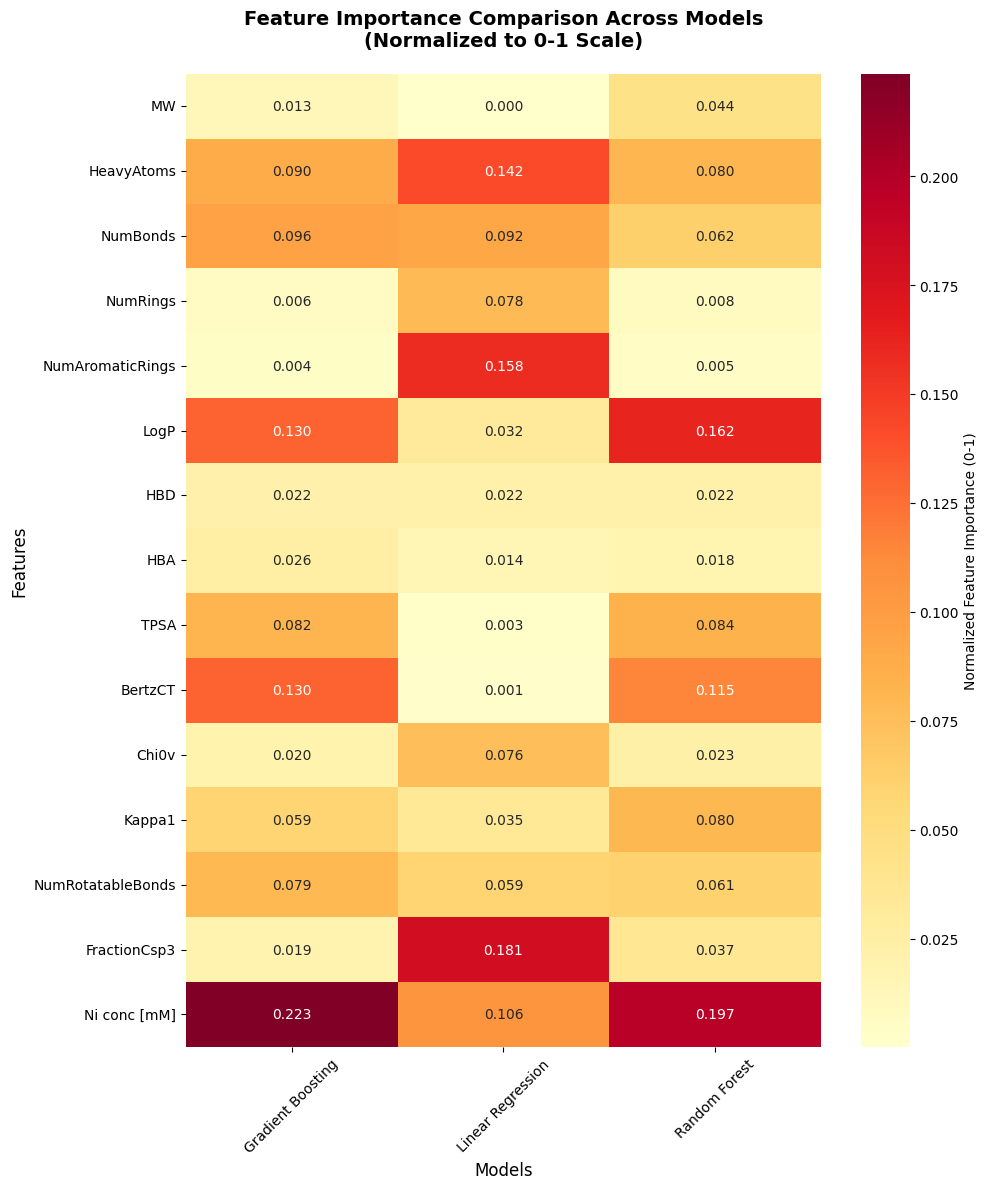


FEATURE CONSISTENCY ACROSS MODELS
Most consistent important features across models:
             feature  avg_rank  appears_in_models
9                 MW       1.0                  3
8         HeavyAtoms       2.0                  3
1           NumBonds       3.0                  3
3           NumRings       4.0                  3
11  NumAromaticRings       5.0                  3
10              LogP       6.0                  3
4                HBD       7.0                  3
0                HBA       8.0                  3
2               TPSA       9.0                  3
13           BertzCT      10.0                  3


In [138]:
# 5. Feature importance analysis for all models
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance for each model
feature_importances = {}

for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        # Tree-based models (Random Forest, Gradient Boosting)
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # Linear models
        importances = np.abs(model.coef_)  # Use absolute values for better comparison
    else:
        # For models without direct feature importance (like Gaussian Process)
        continue
    
    feature_importances[name] = pd.DataFrame({
        'feature': feature_cols,
        'importance': importances
    }).sort_values('importance', ascending=False)

# Create normalized feature importance matrix for heatmap
all_features = feature_cols
importance_matrix = pd.DataFrame(index=all_features)

for model_name, importance_df in feature_importances.items():
    # Normalize importances to 0-1 scale for each model
    importances = importance_df.set_index('feature')['importance']
    normalized_importances = importances / sum(importances)  # Normalize to 0-1
    importance_matrix[model_name] = normalized_importances.reindex(all_features, fill_value=0)

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 12))

sns.heatmap(importance_matrix, 
            annot=True, 
            fmt='.3f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Normalized Feature Importance (0-1)'},
            ax=ax)

ax.set_title('Feature Importance Comparison Across Models\n(Normalized to 0-1 Scale)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Features', fontsize=12)
ax.set_xlabel('Models', fontsize=12)
ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Feature consistency analysis
print("\n" + "="*50)
print("FEATURE CONSISTENCY ACROSS MODELS")
print("="*50)

all_top_features = set()
for importance_df in feature_importances.values():
    all_top_features.update(importance_df.head(10)['feature'].tolist())

consistency_analysis = []
for feature in all_top_features:
    feature_ranks = {}
    feature_importances_vals = {}
    
    for model_name, importance_df in feature_importances.items():
        if feature in importance_df['feature'].values:
            rank = importance_df[importance_df['feature'] == feature].index[0] + 1
            importance = importance_df[importance_df['feature'] == feature]['importance'].iloc[0]
        else:
            rank = len(feature_cols) + 1  # Assign low rank if not in top features
            importance = 0
        
        feature_ranks[f'{model_name}_rank'] = rank
        feature_importances_vals[f'{model_name}_importance'] = importance
    
    consistency_analysis.append({
        'feature': feature,
        'avg_rank': np.mean(list(feature_ranks.values())),
        'appears_in_models': sum(1 for r in feature_ranks.values() if r <= 10),
        **feature_ranks,
        **feature_importances_vals
    })

consistency_df = pd.DataFrame(consistency_analysis).sort_values('avg_rank')
print("Most consistent important features across models:")
print(consistency_df[['feature', 'avg_rank', 'appears_in_models']].head(10))

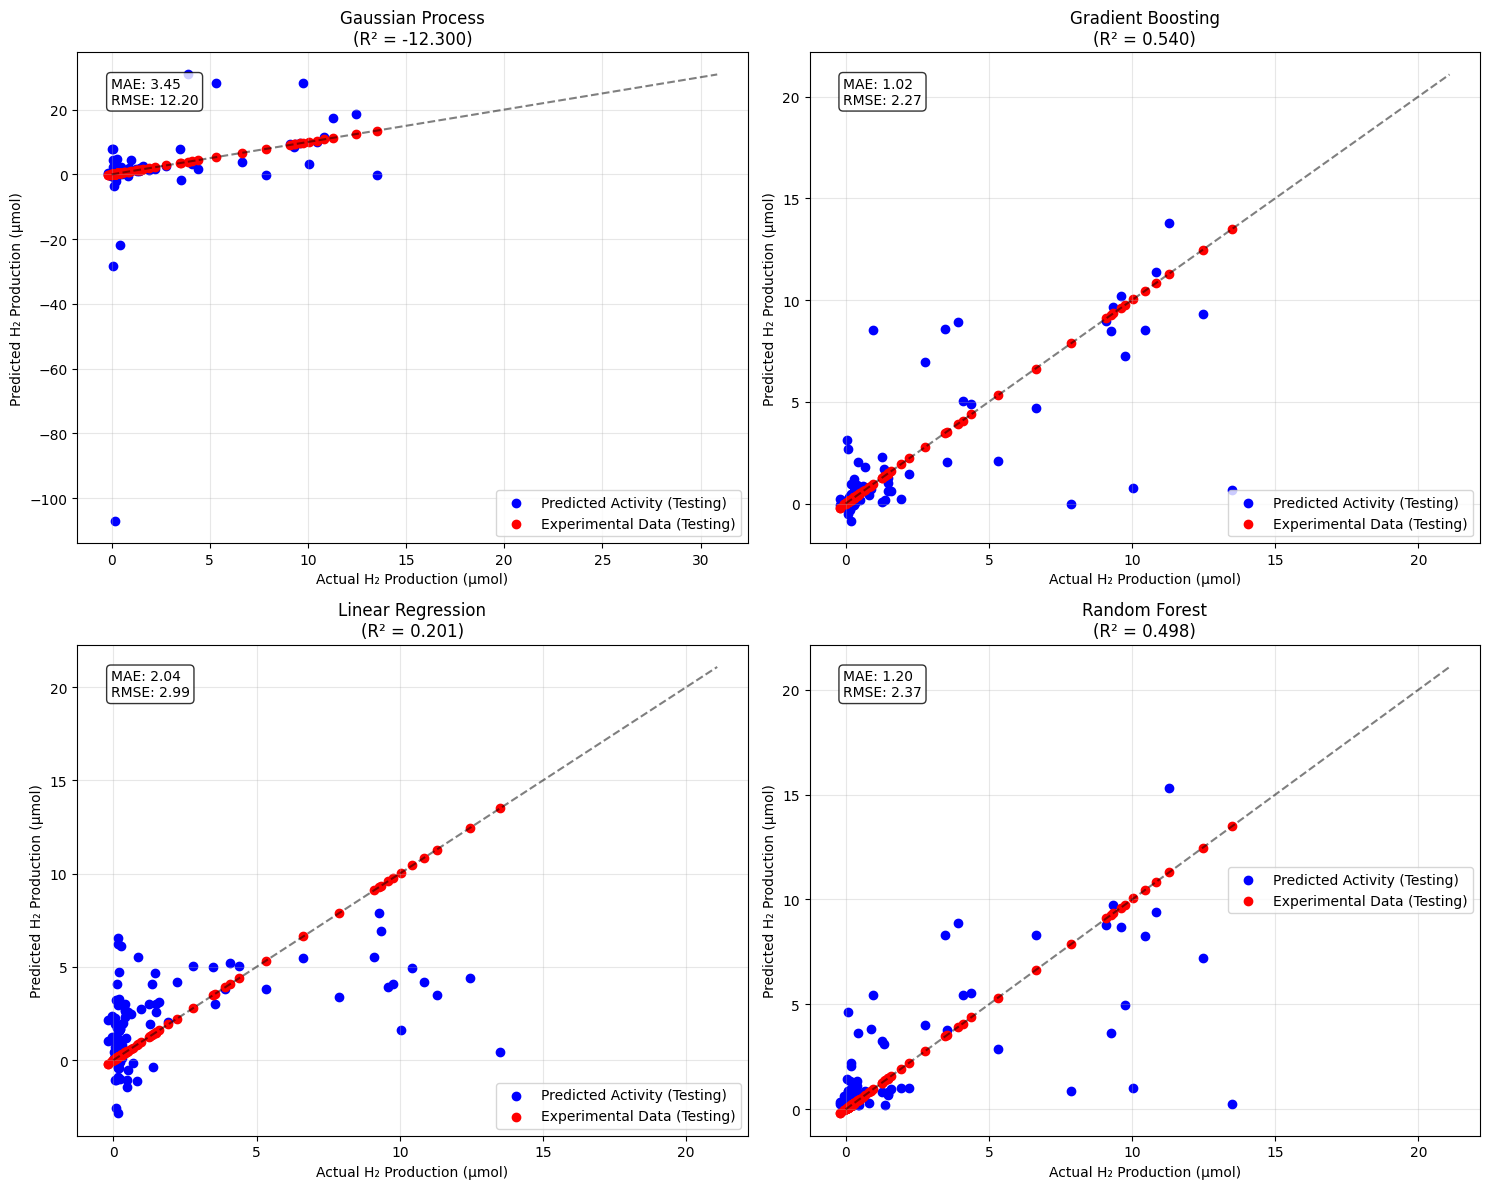


Model Performance Summary:
Gaussian Process     | R²: -12.300 | MAE: 3.45 | RMSE: 12.20
Gradient Boosting    | R²: 0.540 | MAE: 1.02 | RMSE: 2.27
Linear Regression    | R²: 0.201 | MAE: 2.04 | RMSE: 2.99
Random Forest        | R²: 0.498 | MAE: 1.20 | RMSE: 2.37


In [150]:
# 6. Model validation and visualization for all models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()  # Flatten for easier indexing

for idx, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Actual vs Predicted
    axes[idx].scatter(y_test, y_pred, color='blue', label='Predicted Activity (Testing)')
    axes[idx].scatter(y_test, y_test, color='red', label='Experimental Data (Testing)')
    
    axes[idx].set_xlabel('Actual H₂ Production (μmol)')
    axes[idx].set_ylabel('Predicted H₂ Production (μmol)')
    axes[idx].set_title(f'{model_name}\n(R² = {r2:.3f})')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()

    # Perfect prediction line
    min_val = 0
    max_val = max(y.max(), model.predict(X).max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 
                   'k--', alpha=0.5, label='Perfect Prediction')
    
    # Add text with additional metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    axes[idx].text(0.05, 0.95, f'MAE: {mae:.2f}\nRMSE: {rmse:.2f}', 
                   transform=axes[idx].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print summary comparison
print("\nModel Performance Summary:")
print("=" * 50)
for model_name in models.keys():
    y_pred = models[model_name].predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name:20} | R²: {r2:.3f} | MAE: {mae:.2f} | RMSE: {rmse:.2f}")

### Economics and Scale Considerations

In [13]:
# Ligand prices
prices = [171.4, 33.2, 144, 58/25, 41, 120, 133/25, 55, 
          89.7, 161, 191, 40.4/5, 75/25, 155.91/1000, 55.8/5, 78.3/5,
          40.9/187.5, 42.55/250, 22.4/5, 34/5, 65.6/5, 49.6/5, 1.14/1000, 63.9/25,
          37.5/5, 43.8/25, 24.5/21.75, 53.1/25, 152/100, 185/(25/1000), 48.3/5, 44.7/4.31,
          87.3/10, 76.1, 23.6/2.5, 45.4/5, 114/0.5, 68.3, 27.8, 112/5,
          21/25, 1, 34.1/5, 75.9, 78.3/50, 157, 37.5/5, 52.8/.45,
          111/5, 44.4/21, 120/5, 124/5, 50.7/5, 52.2/5, 98.4/5, 45.3/5] # $/g
price_data = {i:j for i,j in zip(mol_names, prices)}

In [14]:
# Calculate economic metrics
economic_df = df.groupby('Ligand Name').first().reset_index()[['Ligand Name']]
economic_df['Prices ($/g)'] = economic_df['Ligand Name'].map(price_data)
economic_df['max h2 (umol)'] = df.groupby('Ligand Name')['max h2 (umol)'].max().reindex(economic_df['Ligand Name']).values
economic_df.head(10)

,Ligand Name,Prices ($/g),max h2 (umol)
0,"1,10-phenanthroline, anhyd",9.080000,0.459525
1,"1,2-Benzenedithiol",171.400000,0.706525
2,"1,2-bis(dicyclohexylphosphino)ethane",144.000000,0.390512
3,"1,3,5 benzene tricarboxylic acid",1.000000,0.822929
4,"1,4-butanedithiol",22.200000,9.647390
5,1-octanethiol,2.114286,18.832912
6,1133-tetramethylguanidine,117.333333,3.414655
7,2 amino benzethiol,2.556000,1.903188
8,"2,2′-Bipyridyl",9.440000,0.659100
9,"2,6 diphenyl pyridine",7400.000000,1.838881


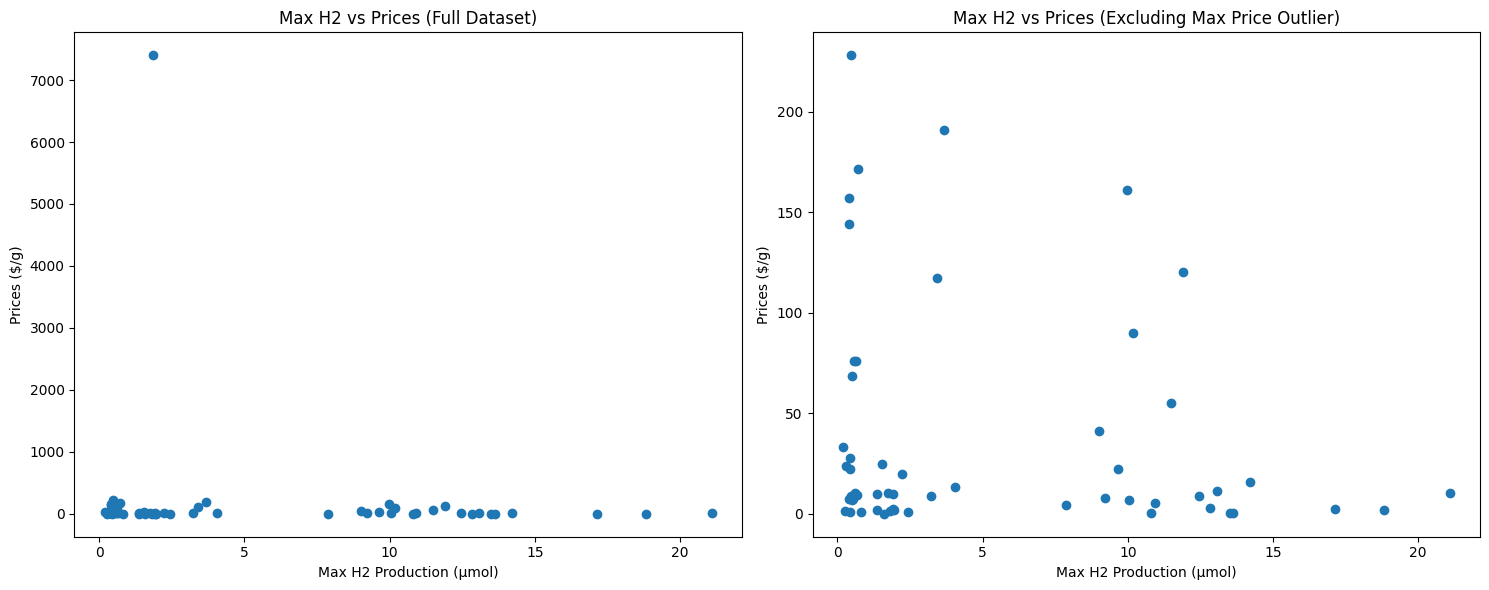

In [15]:
# Visualization: Max H2 vs Prices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Full dataset
axes[0].scatter(economic_df['max h2 (umol)'], 
                economic_df['Prices ($/g)'], 
                #c=economic_df['Scalability_Score'], 
                #cmap='viridis', s=100, alpha=0.7
                )
axes[0].set_xlabel('Max H2 Production (μmol)')
axes[0].set_ylabel('Prices ($/g)')
axes[0].set_title('Max H2 vs Prices (Full Dataset)')
#cbar1 = plt.colorbar(axes[0].collections[0], ax=axes[0])
#cbar1.set_label('Scalability Score')

# Exclude max price outlier
outlier_price = economic_df['Prices ($/g)'].max()
filtered_df = economic_df[economic_df['Prices ($/g)'] < outlier_price]
axes[1].scatter(filtered_df['max h2 (umol)'], 
                filtered_df['Prices ($/g)'])
axes[1].set_xlabel('Max H2 Production (μmol)')
axes[1].set_ylabel('Prices ($/g)')
axes[1].set_title('Max H2 vs Prices (Excluding Max Price Outlier)')
#cbar2 = plt.colorbar(axes[1].collections[0], ax=axes[1])
#cbar2.set_label('Scalability Score')

plt.tight_layout()
plt.show()